In [3]:
# Data Analysis and Preprocessing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# For File Navigation
import os

# Our NLP Library which includes the Word2Vec algorithm
import gensim

# For tokenizing corpus into sentences
import nltk
from nltk.corpus import stopwords

# For tokenizing the sentences into words, lowercase them and remove punctuation marks
from gensim.utils import simple_preprocess
# For removing stopwords
from gensim.parsing.preprocessing import remove_stopwords

# Generate WordCloud
from wordcloud import WordCloud

# PCA
from sklearn.decomposition import PCA

import string

In [5]:
df = pd.read_csv('../Harry_Potter_Movies/Dialogue.csv', encoding='ISO-8859-1')
df

,Dialogue ID,Chapter ID,Place ID,Character ID,Dialogue
0,1,1,8,4,I should have known that you would be here...P...
1,2,1,8,7,"Good evening, Professor Dumbledore. Are the ru..."
2,3,1,8,4,"I'm afraid so, Professor. The good, and the bad."
3,4,1,8,7,And the boy?
4,5,1,8,4,Hagrid is bringing him.
...,...,...,...,...,...
7439,7440,234,71,1,Then Slytherin House will have gained a wonder...
7440,7441,234,71,84,Really?
7441,7442,234,71,1,Really.
7442,7443,234,71,1,Ready?


In [7]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation," ")
    return text

df["Tokens"] = df["Dialogue"].str.lower().apply(remove_punctuations).apply(nltk.word_tokenize)
df["Tokens"]
df

dialoge = df["Tokens"].tolist()
filtered_tokens = []
for line in dialoge:
    line_list = []
    for token in line:
        if token.lower() not in stopwords.words('english') and token not in string.punctuation:
            line_list.append(token)

    filtered_tokens.append(line_list)

In [22]:
gensim_model_sg = gensim.models.Word2Vec(
    vector_size=1000,
    window=5,  
    min_count=3,
    workers=4,
    sg=1,
)
gensim_model_sg.build_vocab(filtered_tokens, progress_per=1000)
gensim_model_sg.train(filtered_tokens, total_examples=gensim_model_sg.corpus_count, epochs=25)
gensim_model_sg.save("../Utils/word2vec_sg.model")


gensim_model_cbow = gensim.models.Word2Vec(
    vector_size=1000,
    window=5,  
    min_count=3,
    workers=4,
    sg=0,
)
gensim_model_cbow.build_vocab(filtered_tokens, progress_per=1000)
gensim_model_cbow.train(filtered_tokens, total_examples=gensim_model_cbow.corpus_count, epochs=25)
gensim_model_cbow.save("../Utils/word2vec_cbow.model")

[('severus', 0.8171256184577942),
 ('potions', 0.789299726486206),
 ('mcgonagall', 0.7863063216209412),
 ('slughorn', 0.774662435054779),
 ('quirrell', 0.7685695290565491),
 ('teaching', 0.7629801034927368),
 ('grandmother', 0.7478223443031311),
 ('occlumency', 0.7391108870506287),
 ('agreed', 0.7371497750282288),
 ('professor', 0.7293018102645874)]

In [34]:
# Word2Vec CBoW Model Check
w2vmodel_cbow = gensim.models.Word2Vec.load("../Utils/word2vec_cbow.model")
print(f"Doesn't match 'dumbledore', 'ron', 'arthur', 'fred', 'george', 'ginny': {w2vmodel_cbow.wv.doesnt_match(['dumbledore', 'ron', 'arthur', 'fred', 'george', 'ginny'])}")
print(f"Doesn't match 'harry', 'ron', 'hermione', 'malfoy': {w2vmodel_cbow.wv.doesnt_match(['harry', 'ron', 'hermione', 'malfoy'])}")
print(f"Doesn't match 'gryffindor', 'slytherin', 'hufflepuff', 'ravenclaw', 'voldemort': {w2vmodel_cbow.wv.doesnt_match(['gryffindor', 'slytherin', 'hufflepuff', 'ravenclaw', 'voldemort'])}")
print(f"Vector similarity 'gryffindor', 'ravenclaw': {w2vmodel_cbow.wv.similarity('gryffindor', 'ravenclaw')}")
print(f"Vector similarity 'gryffindor', 'malfoy': {w2vmodel_cbow.wv.similarity('gryffindor', 'malfoy')}")
print(f"Vector similarity 'gryffindor', 'voldemort': {w2vmodel_cbow.wv.similarity('gryffindor', 'voldemort')}")

Doesn't match 'dumbledore', 'ron', 'arthur', 'fred', 'george', 'ginny': ron
Doesn't match 'harry', 'ron', 'hermione', 'malfoy': ron
Doesn't match 'gryffindor', 'slytherin', 'hufflepuff', 'ravenclaw', 'voldemort': voldemort
Vector similarity 'gryffindor', 'ravenclaw': 0.8811679482460022
Vector similarity 'gryffindor', 'malfoy': 0.8682464361190796
Vector similarity 'gryffindor', 'voldemort': 0.5200866460800171


In [47]:
w2vmodel_cbow.wv.most_similar('snape')

[('severus', 0.9804268479347229),
 ('professor', 0.9734567999839783),
 ('quirrell', 0.9727271795272827),
 ('faithful', 0.9687085151672363),
 ('idea', 0.9686374664306641),
 ('mcgonagall', 0.9678597450256348),
 ('trust', 0.9675794243812561),
 ('headmaster', 0.9671908020973206),
 ('merrythought', 0.9658948183059692),
 ('knows', 0.9650515913963318)]

In [35]:
# Word2Vec Skip-Gram Model Check
w2v_model_sg = gensim.models.Word2Vec.load("../Utils/word2vec_sg.model")
print(f"Doesn't match 'dumbledore', 'ron', 'arthur', 'fred', 'george', 'ginny': {w2v_model_sg.wv.doesnt_match(['dumbledore', 'ron', 'arthur', 'fred', 'george', 'ginny'])}")
print(f"Doesn't match 'harry', 'ron', 'hermione', 'malfoy': {w2v_model_sg.wv.doesnt_match(['harry', 'ron', 'hermione', 'malfoy'])}")
print(f"Doesn't match 'gryffindor', 'slytherin', 'hufflepuff', 'ravenclaw', 'voldemort': {w2v_model_sg.wv.doesnt_match(['gryffindor', 'slytherin', 'hufflepuff', 'ravenclaw', 'voldemort'])}")
print(f"Vector similarity 'gryffindor', 'ravenclaw': {w2v_model_sg.wv.similarity('gryffindor', 'ravenclaw')}")
print(f"Vector similarity 'gryffindor', 'malfoy': {w2v_model_sg.wv.similarity('gryffindor', 'malfoy')}")
print(f"Vector similarity 'gryffindor', 'voldemort': {w2v_model_sg.wv.similarity('gryffindor', 'voldemort')}")

Doesn't match 'dumbledore', 'ron', 'arthur', 'fred', 'george', 'ginny': dumbledore
Doesn't match 'harry', 'ron', 'hermione', 'malfoy': malfoy
Doesn't match 'gryffindor', 'slytherin', 'hufflepuff', 'ravenclaw', 'voldemort': voldemort
Vector similarity 'gryffindor', 'ravenclaw': 0.8083133697509766
Vector similarity 'gryffindor', 'malfoy': 0.2862491309642792
Vector similarity 'gryffindor', 'voldemort': 0.044648874551057816


<function matplotlib.pyplot.show(close=None, block=None)>

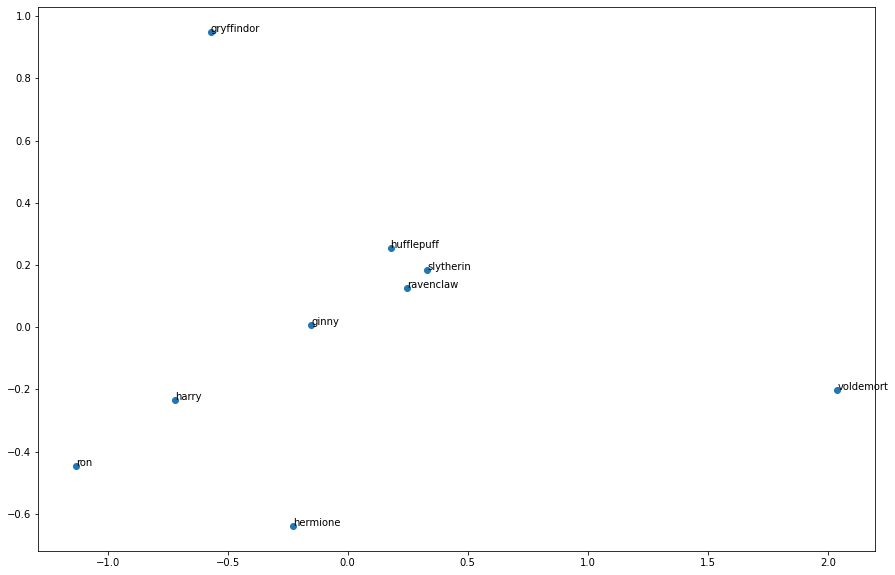

In [36]:
import sklearn
from sklearn.decomposition import PCA
from matplotlib import pyplot

words =['harry', 'ron', 'hermione', 'voldemort', 'ginny', 'gryffindor', 'slytherin','hufflepuff', 'ravenclaw']
X = w2vmodel_cbow.wv[words]
X
pca = PCA(n_components =2)
result = pca.fit_transform(X)
result
pyplot.figure(figsize=(15,10))
pyplot.scatter(result[:,0], result[:,1])
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i,0],result[i,1]))
pyplot.show

In [29]:
# Fasttext needs a single .txt corpus (not a list of tokens). So we preprocess all dialogue, concatenate it and save it into a new file

story = []

corpus = df['Dialogue'].tolist()
raw = ''.join(corpus)
raw_sent = nltk.sent_tokenize(raw)
for sent in raw_sent:
        # 3 - Removal of stopwords
        sent = remove_stopwords(sent)
        
        # 4 - Removal of punctuation marks 
        # 5 - Tokenization of sentences to words
        story.append(simple_preprocess(sent))
story = [x for x in story if x]

story_concat = []
token_join = []

for token in story:
    tokenjoin = ' '.join(token)
    token_join.append(tokenjoin)
storyjoin = ' '.join(token_join)
story_concat.append(storyjoin)

# Convert String to list
string = ''.join(story_concat)

# Open a new file in write mode
f = open('../Utils/DialogueCorpus.txt', 'w')

# Write a string to the file
f.write(string)

# Close the file
f.close()

In [39]:
import fasttext

input_corpus = '../Utils/DialogueCorpus.txt'

VERBOSE = 2         # Console Log verbosity (1: reduced Log, 0: no log)
EPOCH = 20          # Iterative training epochs
DIM = 100           # Vector Dimensions
THREAD = 8          # CPU Threads (1 if you are not sure)
LR = 0.3            # Learn rate
lRUPDATERATE = 100  # Learnrate autoreduction (100 means 100 percent reduction over all epochs)
WS = 10             # WindowSize
NGRAM = 4           # ngram range (unigrams, bigrams, trigrams, etc.)
MINN = 2            # minimal number of word occurences [1]

# train the Skipgram model :
ft_model_sg = fasttext.train_unsupervised(
    input_corpus, 
    model='skipgram', 
    dim = DIM, epoch = EPOCH, 
    lr = LR, 
    lrUpdateRate = lRUPDATERATE, 
    thread = THREAD,
    ws = WS,
    wordNgrams = NGRAM,
    minCount = MINN         
    )
ft_model_sg.save_model("../Utils/fasttext_sg.model")

# or, train the cbow model :
ft_model_cbow = fasttext.train_unsupervised(
    input_corpus, 
    model='cbow', 
    dim = DIM, 
    epoch = EPOCH, 
    lr = LR, 
    lrUpdateRate = lRUPDATERATE, 
    thread = THREAD,
    ws = WS,
    wordNgrams = NGRAM,
    minCount = MINN
    )
ft_model_cbow.save_model("../Utils/fasttext_cbow.model")


Read 0M words
Number of words:  3043
Number of labels: 0
Progress: 100.0% words/sec/thread:   66059 lr:  0.000000 avg.loss: 16.070963 ETA:   0h 0m 0s
Read 0M words
Number of words:  3043
Number of labels: 0
Progress: 100.0% words/sec/thread:  125408 lr:  0.000000 avg.loss:  2.266031 ETA:   0h 0m 0s


In [46]:
ft_model_sg = fasttext.load_model("../Utils/fasttext_sg.model")
ft_model_cbow = fasttext.load_model("../Utils/fasttext_cbow.model")

print(ft_model_sg.get_nearest_neighbors('weasley', 3))
print(ft_model_cbow.get_nearest_neighbors('weasly', 3))

word = 'potion'
print(ft_model_sg.get_nearest_neighbors(word, 3))
print(ft_model_cbow.get_nearest_neighbors(word, 3))

ft_model_cbow.get_analogies("secret", "hogwarts", "snake", 3)
ft_model_cbow.get_analogies("harry", "ron", "hermione", 3)
ft_model_sg.get_analogies("chamber", "hogwarts", "slytherin", 3)
ft_model_sg.get_analogies("harry", "ron", "hermione", 3)
print(ft_model_sg.get_analogies("hogwarts", "gryffindor", "slytherin", 3))
ft_model_cbow.get_analogies("lestrange", "malfoy", "voldemort", 3)

[(0.40337055921554565, 'susan'), (0.388502299785614, 'game'), (0.38845568895339966, 'captain')]
[(0.7483243346214294, 'weasle'), (0.5932480692863464, 'weasley'), (0.5753625631332397, 'weasleys')]
[(0.5883768796920776, 'brewing'), (0.5739725828170776, 'polyjuice'), (0.4621232748031616, 'habit')]
[(0.5949199795722961, 'potions'), (0.5224819183349609, 'action'), (0.4772787094116211, 'lion')]
[(0.3781333565711975, 'sending'), (0.35475876927375793, 'named'), (0.3338356614112854, 'otherwise')]


[(0.4964796006679535, 'strange'),
 (0.33821314573287964, 'foulest'),
 (0.336564302444458, 'transferred')]